# Analysis

Creating relations between all columns with the effect measuments one to undestand their pattern and interference

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("../data/treated_data/table.txt", dtype='unicode')
df = df.drop(['line'], axis=1)
df.iloc[:5]

,test_id,test_cas,organism_lifestage,species_number,organism_age_mean,organism_gender,study_duration_mean,exposure_duration_mean,test_type,num_doses_mean,...,cas_number,chem_name,formulation,chemical_name,common_name,kingdom,class,tax_order,family,species
0,13,50293,NR,5022,NR,NR,8,8,NC,1,...,67641,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
1,13,50293,NR,5022,NR,NR,8,8,NC,1,...,67641,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
2,13,50293,NR,5022,NR,NR,8,8,NC,1,...,67641,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
3,13,50293,NR,5022,NR,NR,8,8,NC,1,...,67641,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
4,13,50293,NR,5022,NR,NR,8,8,NC,1,...,67641,2-Propanone,NR,2-Propanone,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma


In [7]:
df.drop(df.loc[df['effect']!='MOR'].index, inplace=True)
df.iloc[:5]

,test_id,test_cas,organism_lifestage,species_number,organism_age_mean,organism_gender,study_duration_mean,exposure_duration_mean,test_type,num_doses_mean,...,cas_number,chem_name,formulation,chemical_name,common_name,kingdom,class,tax_order,family,species
32,48691,10108642,MA,5022,NR,NR,75,NR,NC,4,...,7732185,Water,NR,Water,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
33,48691,10108642,MA,5022,NR,NR,75,NR,NC,4,...,7732185,Water,NR,Water,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
34,48691,10108642,MA,5022,NR,NR,75,NR,NC,4,...,7732185,Water,NR,Water,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
35,48691,10108642,MA,5022,NR,NR,75,NR,NC,4,...,7732185,Water,NR,Water,Indian Earthworm,Animalia,Oligochaeta,Haplotaxida,Megascolecidae,posthuma
1206,50,32774166,AD,28839,NR,Female,135,135,NC,3,...,67641,2-Propanone,NR,2-Propanone,American Mink,Animalia,Mammalia,Carnivora,Mustelidae,vison


Here we will try to get the relation of a specific value in the Species column with the effect Measument column

# Trying to create a filter

The ideia is to understand how to create analysis betweet species and mortality

In [8]:
cols       = df.columns

table_cols = []
for c in cols.values:
    if c   != 'measurement':
        table_cols.append(c)

In [9]:
for c in table_cols:
    df.loc[df[c].isnull(),c] = 0
    
df.describe()

,test_id,test_cas,organism_lifestage,species_number,organism_age_mean,organism_gender,study_duration_mean,exposure_duration_mean,test_type,num_doses_mean,...,cas_number,chem_name,formulation,chemical_name,common_name,kingdom,class,tax_order,family,species
count,134451,134451,134451,134451,134451,134451,134451,134451,134451,134451,...,134451,134451,134451,134451,134451,134451,134451,134451,134451,134451
unique,1542,347,27,143,40,4,77,77,2,13,...,59,59,7,59,125,2,15,46,82,122
top,53272,60571,JV,4510,NR,Both,37,36,NC,6,...,64175,Ethanol,NR,Ethanol,Norway Rat,Animalia,Mammalia,Rodentia,Muridae,norvegicus
freq,16170,32210,74857,78737,101211,108613,52658,51938,134428,64808,...,59849,59849,133242,59849,78737,132468,99057,96081,95948,78737


In [10]:
measurement_dict = df['measurement'].value_counts().to_dict()
measurement_dict

{'GMOR/': 93791,
 'MORT': 29550,
 'SURV': 9187,
 'TDTH': 981,
 'HTCH': 745,
 'GMOR': 145,
 'TKNO': 27,
 'MDTH': 13,
 'TLET': 6,
 'SVVS': 5,
 'LFSP': 1}

Recorrence number for all values in each column

In [11]:
value_counts_dict = {c: dict(df[c].value_counts()) for c in table_cols}
value_counts_dict

{'test_id': {'53272': 16170,
  '53273': 15588,
  '54831': 11344,
  '53271': 9168,
  '51856': 5016,
  '53270': 4896,
  '52849': 3600,
  '53275': 3460,
  '52848': 3006,
  '2580': 2450,
  '51743': 1890,
  '53292': 1872,
  '51857': 1872,
  '52537': 1744,
  '51855': 1653,
  '53291': 1584,
  '51858': 1548,
  '53641': 1296,
  '53110': 1290,
  '53053': 1276,
  '53269': 1232,
  '54917': 1152,
  '54916': 1152,
  '54918': 1144,
  '53111': 830,
  '47414': 756,
  '47412': 756,
  '47411': 756,
  '47413': 756,
  '47415': 756,
  '2110': 680,
  '51883': 672,
  '51650': 648,
  '51748': 627,
  '51139': 627,
  '52525': 616,
  '54934': 600,
  '52374': 592,
  '51884': 588,
  '54935': 584,
  '52380': 560,
  '53276': 560,
  '53112': 540,
  '53108': 532,
  '458': 492,
  '49974': 485,
  '53903': 480,
  '53277': 468,
  '52526': 459,
  '53647': 456,
  '49980': 396,
  '49976': 392,
  '49975': 392,
  '53268': 390,
  '52592': 384,
  '52591': 384,
  '52058': 368,
  '266': 360,
  '262': 360,
  '46559': 350,
  '50': 34

In [12]:
df_clone = df # Just a df restart for test

The relation table will have the value for each species in effect Measument  values

In [13]:
df_columns  = list(measurement_dict.keys())
df_columns  = ["Species"] + df_columns

df_new      = pd.DataFrame(columns = df_columns)

df_new

,Species,GMOR/,MORT,SURV,TDTH,HTCH,GMOR,TKNO,MDTH,TLET,SVVS,LFSP


All the values for this tets table

In [14]:
df_trash  = df[df.species == 'norvegicus']

new_list  = []
for m in measurement_dict.keys():
    df_t  = df_trash[df_trash.measurement == m]
    new_list.append(str(df_t.shape[0]))

new_list.insert(0,'norvegicus')

new_list
a         = np.array(new_list)
new_list  = a.transpose().tolist()

print(new_list)
print(df_columns)

['norvegicus', '60737', '12841', '5118', '40', '0', '1', '0', '0', '0', '0', '0']
['Species', 'GMOR/', 'MORT', 'SURV', 'TDTH', 'HTCH', 'GMOR', 'TKNO', 'MDTH', 'TLET', 'SVVS', 'LFSP']


Creating the final test table

In [15]:
current_row = pd.DataFrame([new_list], columns=df_columns)

current_row


,Species,GMOR/,MORT,SURV,TDTH,HTCH,GMOR,TKNO,MDTH,TLET,SVVS,LFSP
0,norvegicus,60737,12841,5118,40,0,1,0,0,0,0,0


Creating dict to get each value as unique id

In [16]:
species_dict = df['species'].value_counts().to_dict()
species_dict

{'norvegicus': 78737,
 'musculus': 15544,
 'platyrhynchos': 5882,
 'colchicus': 5364,
 'japonica': 5290,
 'terrestris': 3808,
 'rubripes': 3186,
 'esculentus': 1813,
 'candida': 1398,
 'alba': 1260,
 'sp.': 1239,
 'andrei': 952,
 'latrans': 919,
 'scrofa': 882,
 'sparverius': 849,
 'domesticus': 834,
 'fetida': 792,
 'aries': 701,
 'virginianus': 689,
 'redividus': 416,
 'hispidus': 370,
 'vison': 348,
 'mellifera': 318,
 'quinquefasciatus': 296,
 'auritus': 215,
 'coturnix': 180,
 'auratus': 145,
 'porcellus': 130,
 'rubellus': 109,
 'scaber': 106,
 'ater': 104,
 'cuniculus': 101,
 'ludovicianus': 98,
 'caliginosa': 84,
 'max': 83,
 'stephensi': 63,
 'confusum': 60,
 'unicolor': 59,
 'leucocephalus': 57,
 'virescens': 56,
 'sanguinalis': 54,
 'vulgaris': 48,
 'glabrum': 41,
 'rosae': 40,
 'quinquemaculata': 39,
 'coffeella': 39,
 'pennsylvanicus': 38,
 'melanogaster': 36,
 'pipiens': 34,
 'aegypti': 31,
 'livia': 31,
 'migratorius': 28,
 'frugiperda': 26,
 'perenne': 24,
 0: 22,
 'ven

Since the example worked, now we'll create an automatizated solution for all values in all columns

In [17]:

# for m in measurement_dict.keys():
#     new_df  = df.columns=[m]
    
# for s in species_dict.keys():
#     new_df  = df(rows=[s])
    
# for m in measurement_dict.keys():
#     new_df    = df[ df.measurement == m ]
#     for s in species_dict.keys():
        
#         new_df = df[df.species == s]
        
#         new_df[m][a] = df['measurement'].value_counts().to_dict().shape[0]

In [18]:
for m in measurement_dict.keys():
    new_df  = df.columns=[m]
print(new_df)
    
for s in species_dict.keys():
    new_df  = df(rows=[s])
print(new_df)

new_list  = []
for m in measurement_dict.keys():
    new_df    = df[ df.measurement == m ]
    for s in species_dict.keys():
        new_list.insert(0,s)
        new_df = df[df.species == s]
        new_df[m][a] = df['measurement'].value_counts().to_dict().shape[0]
        
a         = np.array(new_list)
new_list  = a.transpose().tolist()
current_row = pd.DataFrame([new_list], columns=df_columns)

ValueError: Length mismatch: Expected axis has 35 elements, new values have 1 elements

# Using query

Creating a filter proved to be a hard way to to something that there's already concepts in python that will help out

This function will show how many times a specific type of mortality effect occur for each species. As for example:

andrei        
GMOR/           814

MORT            138

Andrei is a worm and it lives in compost or leaf litter. Also, in experimenting with this species, there was 814 cases of GMOR (this reference can be seen in past analysis) and 138 MORT, or 14% of Andrei had MORT effect with MORT measurement.

In [19]:
n = df.query('effect == "MOR"')
speciesMeasurement = n.groupby(['species', 'measurement']).size()
speciesMeasurement

species       measurement
0             MORT             15
              SURV              6
              TKNO              1
aegypti       MORT             31
alba          GMOR/          1260
americana     MORT             15
andrei        GMOR/           814
              MORT            138
aries         MORT            701
armata        MORT              2
              SURV              6
armigera      MORT              8
arvensis      MORT              1
aspersa       MORT              4
ater          MORT            104
auratus       MORT             10
              SURV            135
auritus       SURV            215
blomhoffii    MORT              2
brassicae     SURV              1
brunneus      MORT              1
caliginosa    MORT             79
              SURV              5
candida       MORT           1174
              SURV            224
castaneum     MORT              3
              TLET              2
catesbeiana   MORT              5
chlorotica    SURV    

In [20]:
n['species']

32         posthuma
33         posthuma
34         posthuma
35         posthuma
1206          vison
1207          vison
1208          vison
1209          vison
1210          vison
1211          vison
1212          vison
1213          vison
1214          vison
1215          vison
1216          vison
1217          vison
1218          vison
1219          vison
1220          vison
1221          vison
1222          vison
1223          vison
1224          vison
1225          vison
1226          vison
1227          vison
1228          vison
1229          vison
1230          vison
1231          vison
             ...   
1630068     glabrum
1630069     glabrum
1630070     glabrum
1630071     glabrum
1630072     glabrum
1630073     glabrum
1630074     glabrum
1630075     glabrum
1630076     glabrum
1630077     glabrum
1630078     glabrum
1630079     glabrum
1630080     glabrum
1630081     glabrum
1630082     glabrum
1630083     glabrum
1630084     glabrum
1630085     glabrum
1630086     glabrum


In [21]:
set(df['measurement'])

{'GMOR',
 'GMOR/',
 'HTCH',
 'LFSP',
 'MDTH',
 'MORT',
 'SURV',
 'SVVS',
 'TDTH',
 'TKNO',
 'TLET'}

In [22]:
n.groupby(['species', 'measurement']).describe()

test_id                     test_cas         \
                           count unique     top freq    count unique   
species      measurement                                               
0            MORT             15     15  538515    1       15     15   
             SURV              6      2    4969    3        6      2   
             TKNO              1      1  556175    1        1      1   
aegypti      MORT             31     31  520128    1       31      7   
alba         GMOR/          1260      2   51883  672     1260      2   
americana    MORT             15      2    2867   12       15      2   
andrei       GMOR/           814      4   46559  350      814      3   
             MORT            138      9   46244   56      138      4   
aries        MORT            701      6   51748  627      701      6   
armata       MORT              2      2   57535    1        2      1   
             SURV              6      6  423498    1        6      1   
armigera     MORT              8      8  554857    1        8      5   
arvensis     MORT              1      1   53989    1        1      1   
aspersa      MORT              4      4   49828    1        4      4   
ater         MORT            104      6   54775   85      104      3   
auratus      MORT             10     10  561684    1       10      2   
             SURV            135      2   53649  106      135      2   
auritus      SURV            215      8   54933  208      215      2   
blomhoffii   MORT              2      2  556170    1        2      2   
brassicae    SURV              1      1  423614    1        1      1   
brunneus     MORT              1      1  521481    1        1      1   
caliginosa   MORT             79      4   46853   20       79      2   
             SURV              5      5   54285    1        5      5   
candida      MORT           1174    119    5258   10     1174     32   
             SURV            224     23    5021   16      224      8   
castaneum    MORT              3      3  517080    1        3      2   
             TLET              2      2   49804    1        2      1   
catesbeiana  MORT              5      1   48021    5        5      1   
chlorotica   SURV              5      5   53790    1        5      5   
cincta       GMOR              1      1  586971    1        1      1   
...                          ...    ...     ...  ...      ...    ...   
saucia       MORT             12      3   48763    4       12      1   
scaber       MORT            106      1   52348  106      106      1   
scandens     MORT              3      3  522958    1        3      3   
scripta      MORT              3      3  474268    1        3      3   
scrofa       MORT            882      2   52374  592      882      1   
sp.          GMOR/          1052     25   51359   44     1052     25   
             MORT            186     14   51793   80      186     13   
             SURV              1      1  591219    1        1      1   
sparverius   GMOR/           630      2   53903  480      630      2   
             MORT            219      4   53020  191      219      3   
sponsa       SURV              1      1  562660    1        1      1   
stephensi    GMOR              4      4  579197    1        4      1   
             MORT             59     59  579182    1       59      3   
terrestris   MORT           3808     25   47412  756     3808     22   
trivittatus  MORT              4      2   51564    2        4      2   
unguiculatus GMOR/             6      1    2672    6        6      1   
             MORT              5      1   54151    5        5      1   
unicolor     GMOR             49     49  550990    1       49     21   
             TKNO             10     10  550695    1       10      7   
urticae      MORT              9      9  428584    1        9      1   
v-nigrum     MORT             11     11  572127    1       11     11   
veneta       MORT             18      1   49766   18       18    

### Creating graph with analysis info

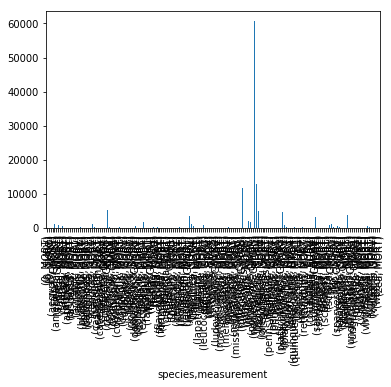

In [23]:
groups = speciesMeasurement
groups.plot.bar()

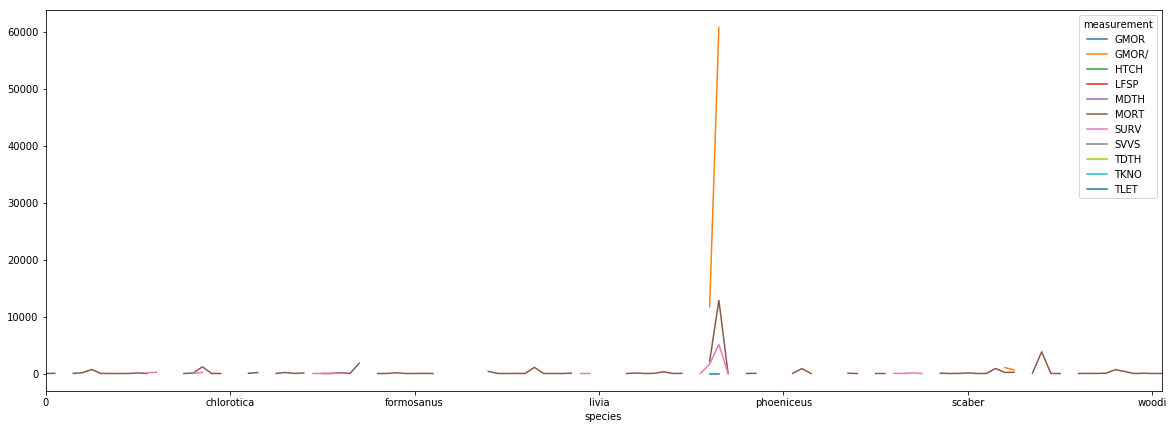

In [24]:

fig, ax = plt.subplots(figsize=(20,7))
speciesMeasurement.unstack().plot(ax=ax)

#data.groupby(['date','type']).count()['amount'].unstack().plot(ax=ax)

Obviously the analysis like that is too verbose and brings no quality in data understanding. One way to solve this, would be conting which species had more occurrencies in each ```measument``` type

### Top 5 species in each measument occurrency

# TODO

### Undestanding the mean value

Cant use ```.mean()``` directly in ```n.groupby(['species', 'measurement'])``` because the value is cathegorical.

# TODO


In [17]:
n.groupby(['species', 'measurement']).mean()

DataError: No numeric types to aggregate